Waste Classification

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.6/11.6 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.0/8.0 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 39.5/39.5 MB 790.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 78.5/78.5 kB 875.6 kB/s eta 0:00:00


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 1.3/390.2 MB 1.1 MB/s eta 0:05:48
   ---------------------------------------- 1.8/390.2 MB 1.4 MB/s eta 0:04:46
   ---------------------------------------- 2.9/390.2 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 3.9/390.2 MB 2.3 MB/s eta 0:02:48
   ---------------------------------------- 4.5/390.2 MB 2.4 MB/s eta 0:02:44
    --------------------------------------- 5.0/390.2 MB 2.4 MB/s eta 0:02:40
    --------------------------------------- 5.2/390.2 MB 2.3 MB/s eta 0:02:50


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:13<00:00, 31.6MB/s]
100% 427M/427M [00:13<00:00, 32.7MB/s]


In [ ]:
! unzip waste-classification-data

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import tensorflow as tf

In [ ]:
#Setting the path for the dataset
train_path = "/content/dataset/DATASET/TRAIN"
test_path = "/content/dataset/DATASET/TEST"

In [ ]:
#Setting the image size
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model

In [ ]:
from glob import glob
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#Setting the image size
x_data = []
y_data = []

In [ ]:
#Reading the images
for category in glob(train_path+"/*"):

    for file in tqdm(glob(category+"/*")):

        img_array = cv2.imread(file)

        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (224, 224))
        x_data.append(img_array)

        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1586.54it/s]


In [ ]:
#Checking the shape of the data
data.shape

(22564, 2)

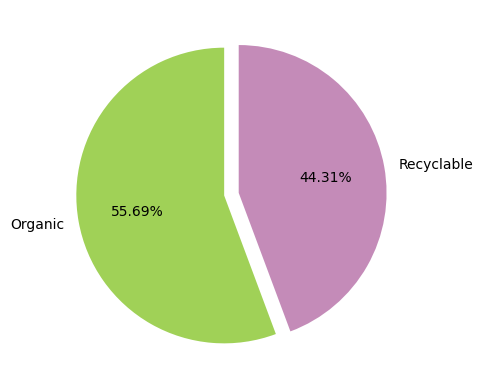

In [ ]:
#Plotting a Pie chart
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

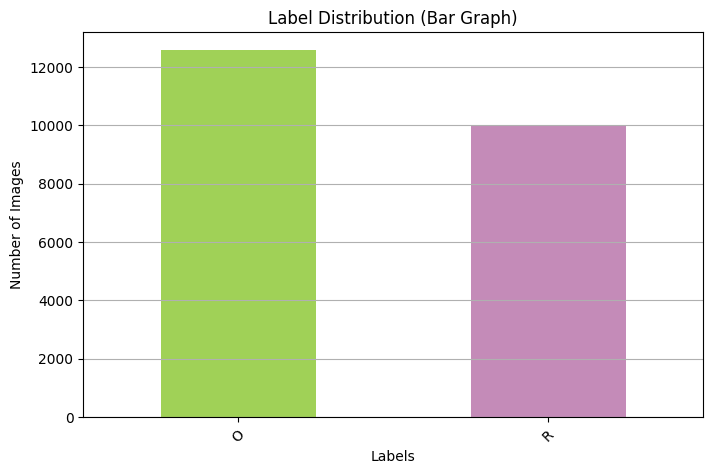

In [ ]:
#Plotting a bar graph
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=colors)
plt.title("Label Distribution (Bar Graph)")
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

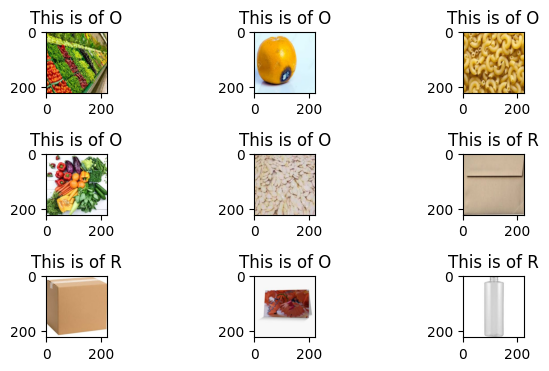

In [ ]:
plt.Figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, i%12+1)
    index = np.random.randint(20000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 32

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,262,146 (84.92 MB)

 Trainable params: 22,261,698 (84.92 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [ ]:
pip install scipy


In [ ]:
hist = model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
 42/706 ━━━━━━━━━━━━━━━━━━━━ 4:14 383ms/step - accuracy: 0.6914 - loss: 5.0017

KeyboardInterrupt: 

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 314s 432ms/step - accuracy: 0.7393 - loss: 3.4419 - val_accuracy: 0.8658 - val_loss: 0.4190
Epoch 2/10
  1/705 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.8125 - loss: 0.4735

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8125 - loss: 0.4735 - val_accuracy: 0.8662 - val_loss: 0.4144
Epoch 3/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 323s 458ms/step - accuracy: 0.8175 - loss: 0.4490 - val_accuracy: 0.8446 - val_loss: 0.4131
Epoch 4/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7500 - loss: 0.4268 - val_accuracy: 0.8421 - val_loss: 0.4329
Epoch 5/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 327s 465ms/step - accuracy: 0.8350 - loss: 0.4008 - val_accuracy: 0.8602 - val_loss: 0.3271
Epoch 6/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8438 - loss: 0.4086 - val_accuracy: 0.8578 - val_loss: 0.3318
Epoch 7/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 322s 457ms/step - accuracy: 0.8453 - loss: 0.3802 - val_accuracy: 0.7268 - val_loss: 0.4766
Epoch 8/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7812 - loss: 0.3948 - val_accuracy: 0.6755 - val_loss: 0.5255
Epoch 9/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 389s 472ms/step - accuracy: 0.8504 - loss: 0.3656 - val_accurac

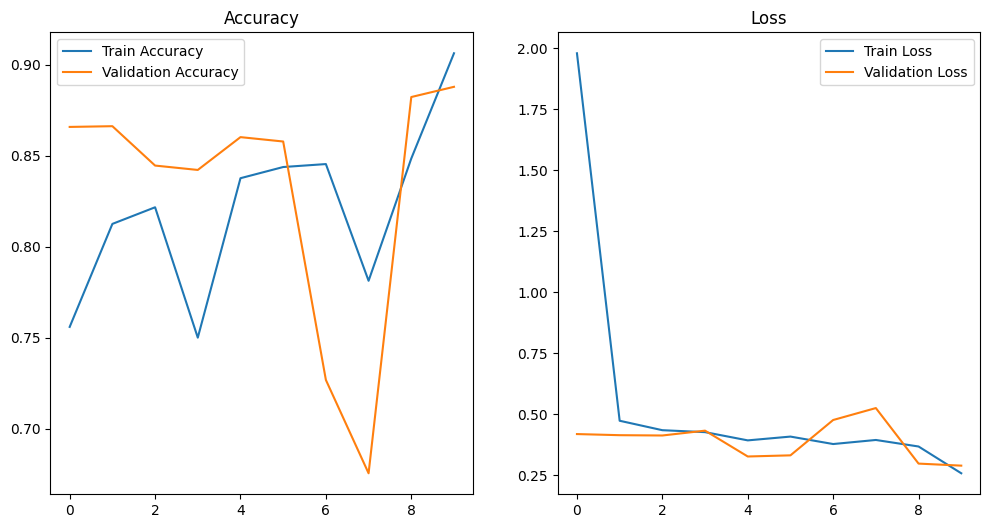

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8824 - loss: 0.2996
Test Accuracy: 0.8878
Test Loss: 0.2898


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


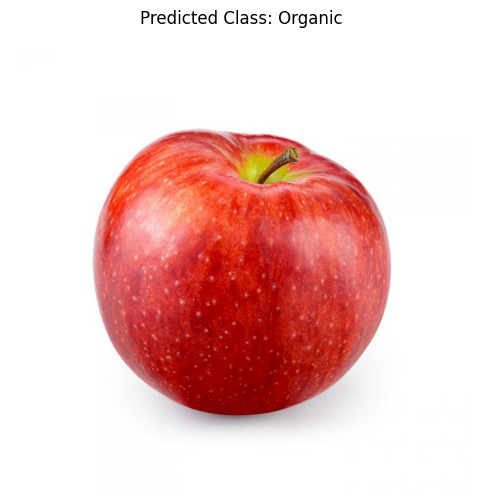

Predicted Class: Organic
Class Probabilities: [0.9498756  0.05012443]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model('/content/best_model.keras')

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_waste_category(image_path):
    preprocessed_image = preprocess_image(image_path)

    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions[0])

    class_labels = ['Organic', 'Recyclable']

    plt.figure(figsize=(10, 6))
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicted Class: {class_labels[predicted_class_index]}")
    plt.axis('off')
    plt.show()

    return class_labels[predicted_class_index], predictions[0]


image_path = '/content/pomme-akane-large.jpg'
predicted_class, probabilities = predict_waste_category(image_path)

print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


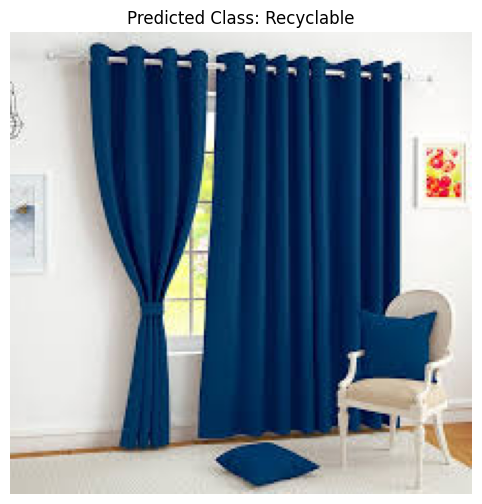

Predicted Class: Recyclable
Class Probabilities: [3.5804661e-04 9.9964190e-01]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('/content/best_model.keras')

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  #
    img_array /= 255.0
    return img_array

def predict_waste_category(image_path):
    preprocessed_image = preprocess_image(image_path)

    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions[0])

    class_labels = ['Organic', 'Recyclable']

    plt.figure(figsize=(10, 6))
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicted Class: {class_labels[predicted_class_index]}")
    plt.axis('off')
    plt.show()

    return class_labels[predicted_class_index], predictions[0]

image_path = '/content/download.jpeg'
predicted_class, probabilities = predict_waste_category(image_path)

print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")